### CS4423 - Networks
Anton Baykalov  
School of Mathematical and Statistical Sciences  
University of Galway  

[![Open in Binder](images/badge_logo.png)](https://mybinder.org/v2/gh/anton-baykalov/networks/HEAD)

https://mybinder.org/v2/gh/anton-baykalov/networks/HEAD



#### 2. Tree and Graph Traversal

# Week 3, lecture 2: Paths, Trees and Algorithms

In [2]:
import networkx as nx
import numpy as np

In [3]:
nodes = 'ABCDEFGHIJKLM'
edges = [
    'AB', 'CE', 'FG', 'FH', 'GI', 'GJ', 'HJ', 'HL', 'HM', 
    'IK', 'JK', 'KL', 'LM'
]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

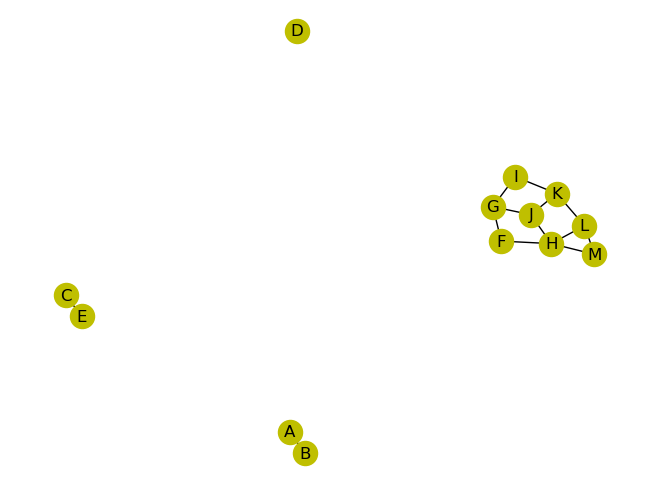

In [4]:
opts = { "with_labels": True, "node_color": 'y'}
nx.draw(G, **opts)

* $(F, G, I)$ is a path in the graph above, and $(H, J, K, L, H)$ is a cycle.

* A cycle in a simple graph provides, for any two nodes on that
cycle, (at least) two different paths from one to the other.

* This can be very handy to provide alternative routes for connectivity in case one of the edges should fail (e.g. in transportation networks). 


## Connected Components

**Definition.**
    <ul>
        <li>A simple graph is <b>connected</b> if, for
every pair of nodes, there is a path between them.
        </li>
        <li>
If a graph is not connected, it naturally breaks into pieces,
its <b>connected components</b>.
       

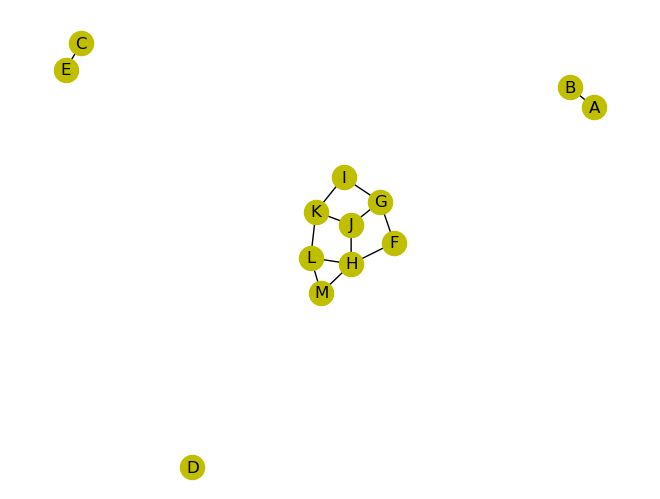

In [5]:
nx.draw(G, **opts)

* The connected components of the graph above are the
node sets $\{A, B\}$, $\{C, E\}$, $\{D\}$, and $\{F,G,H,I,J,K,L,M\}$.
* Note that a component can consist of a single node only.

In [6]:
CC = list(nx.connected_components(G))
CC

[{'A', 'B'}, {'C', 'E'}, {'D'}, {'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'}]

**Note.** 

The connected components of a graph are the equivalence classes of the equivalence relation 'there is a **path** from $x$ to $y$ on the node set $X$ of the
graph. This, in turn, is the **transitive closure** of the graph relation 'there is an
**edge** between $x$ and $y$'. 

If the vertices are ordered by the components, then the adjecency matrix is **block-diagonal**:
$$\mathrm{bd}[A_1, A_2, \ldots, A_k] = 
\begin{bmatrix}
A_1 & 0 & \cdots & 0 \\
 0 & A_2 & 0 & \cdots \\
 & & \ddots  & \\
 0 & \cdots & 0 & A_k
\end{bmatrix}$$

In [7]:
A = nx.adjacency_matrix(G).toarray()
A

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])

### Permuting nodes
As we have seen many times, changing the order of verticies changes the shape of the adjacency matrix.

But how?

Let $G = (V,E)$.
Let $\pi : V \to V$ be a **permutation** (so, a bijection) and $P$ be the corresponding **permutation matrix**. Then 
$$A_{\pi} = P A P^{T}.$$

This is very similar to the [change of basis for a liniar map](https://en.wikipedia.org/wiki/Change_of_basis#Endomorphisms) on a vector space: 

If $\phi$ is a linear map from a vector space $W$ to itself, $P$ is change-of-base matrix from old basis to a new one, then 
$$[\phi]_{\text{new}} = P [\phi]_{\text{old}} P^{-1}.$$

In particular, in our case $P^{-1}=P^{T}$ since $P$ is a permutation matrix.

In [8]:
flatCC = [x for s in CC for x in s]
print(list(G.nodes))
print(CC)
print(flatCC)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']
[{'A', 'B'}, {'C', 'E'}, {'D'}, {'J', 'M', 'G', 'L', 'K', 'I', 'F', 'H'}]
['A', 'B', 'C', 'E', 'D', 'J', 'M', 'G', 'L', 'K', 'I', 'F', 'H']


In [9]:
idx = {v: i for i, v in enumerate(list(G.nodes))}
perm = np.array([idx[v] for v in flatCC])
perm

array([ 0,  1,  2,  4,  3,  9, 12,  6, 11, 10,  8,  5,  7])

In [10]:
P = np.eye(len(perm))[perm]
print(P, '\n')
print(P.T, '\n')
print(P @ A @P.T)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

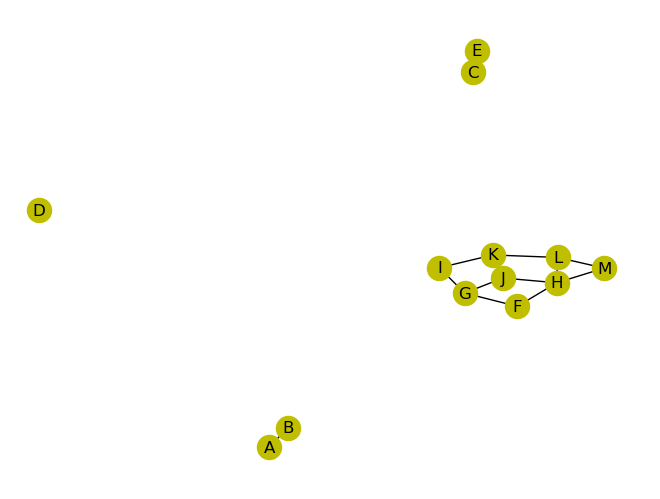

In [11]:
H = nx.Graph()
for comp in CC:
    H.add_nodes_from(comp)
H.add_edges_from(G.edges)
nx.draw(H, **opts)

In [12]:
print(list(nx.connected_components(H)))
nx.adjacency_matrix(H).toarray()

[{'A', 'B'}, {'C', 'E'}, {'D'}, {'J', 'M', 'G', 'K', 'L', 'I', 'F', 'H'}]


array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0]])

##  Trees

* A graph is called **acyclic** if it does not contain any cycles.

*    A <b>tree</b> is a (simple) graph that is <b>connected</b> and <b>acyclic</b>.

In other words, between any two vertices in a tree there is **exactly one simple path**.

Trees can be characterized in many different ways.



**Theorem.**  Let $G = (X, E)$ be a (simple) graph of order $n = |X|$
and size $m = |E|$.
Then the following are equivalent:

* $G$ is a tree (i.e. acyclic and connected);

* $G$ is connected and $m = n-1$;

* $G$ is a minimally connected graph (i.e., removing any edge will disconnect $G$);

* $G$ is acyclic and $m = n-1$;

* $G$ is a maximally acyclic graph (i.e., adding any edge will introduce a cycle in $G$).

## Random Trees

We can ask `networkx` to produce a **random tree** with a given number of nodes:

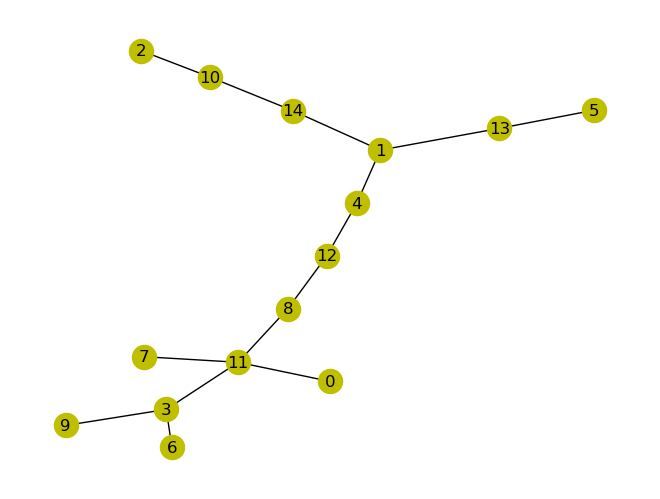

In [13]:
T = nx.random_labeled_tree(15)
nx.draw(T, **opts)


In [14]:
T.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14))

<b>Theorem (Cayley's Formula).</b>
    There are exactly $n^{n-2}$ distinct (labelled) trees on the $n$-element vertex set 
    $X = \{0, 1, 2, \dots, n-1\}$, if $n > 1$.

Also, there is one (trivial) tree on $1$ vertex.  Some values for $n > 1$:

In [15]:
domain = range(2, 10)
print(np.array([domain, [n**(n-2) for n in domain]]))

[[      2       3       4       5       6       7       8       9]
 [      1       3      16     125    1296   16807  262144 4782969]]


**Proof.** We will prove this formula by giving a bijective correspondence between trees on $X = \{0, 1, 2, \dots, n-1\}$ and sequences of
$n-2$ elements of $X$. The (unique) sequence of $n-2$ elements of $X$ associated with a tree via this bijection is its [**Prüfer Code**](https://en.wikipedia.org/wiki/Pr%C3%BCfer_sequence).

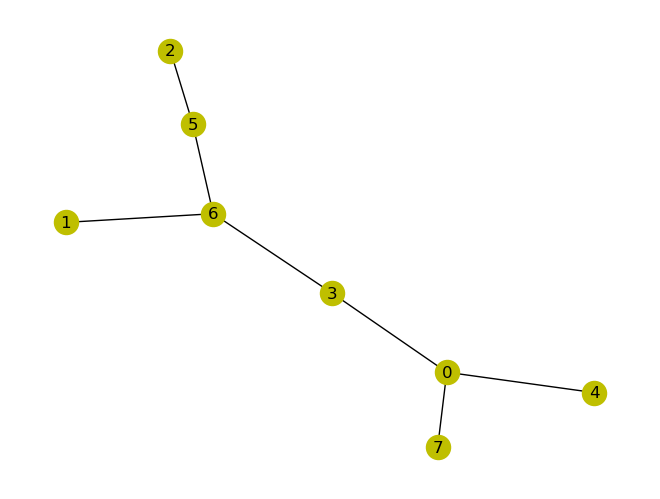

In [16]:
n = 8
TT = nx.random_labeled_tree(n)
nx.draw(TT, **opts)

In [17]:
T = TT.copy()

How to determine the Prüfer code of a tree $T$ (destructively):

* Find the smallest leaf $x$
* Record the label $y$ of its unique neighbour
* Remove $x$ (and the edge $x - y$) from $T$
* Repeat until $T$ has only $2$ nodes left.

In [18]:
def pruefer_list(tree):
    for x in tree:
        if tree.degree(x) == 1:
            for y in tree[x]:
                tree.remove_node(x)
                return [x, y] 

**Note.** Here we can skip step $1$ of the algorithm since the nodes are visited from the smallest to the largest anyway.

In [19]:
T = TT.copy()
code = [pruefer_list(T) for k in range(n-2)]

In [20]:
print(np.array(code).transpose())

[[1 2 4 5 6 3]
 [6 5 0 6 3 0]]


This process destroys the tree `T` almost completely.

In [21]:
print(T.nodes())
print(T.edges())

[0, 7]
[(0, 7)]


Let's wrap this up as a `python` function

In [22]:
def pruefer_node(tree):
    for x in tree:
        if tree.degree(x) == 1:
            for y in tree[x]:
                tree.remove_node(x)
                return y

In [23]:
def pruefer_code(tree):
    return [pruefer_node(tree) for k in range(tree.order() - 2)]

In [24]:
T = TT.copy()
code = pruefer_code(T)
code

[6, 5, 0, 6, 3, 0]

Maybe surprisingly, the tree can be reconstructed from its Prüfer code.  This is based on the following fact
and shows that the map from trees to codes is a bijection!


<b>Fact:</b> The degree of node $x$ is $1$ plus the number of entries $x$ in the Prüfer code of $T$.


In [25]:
degrees = [1 for k in range(n)]
for k in code:
    degrees[k] += 1
degrees

[3, 1, 1, 2, 1, 2, 3, 1]

In [26]:
[TT.degree[x] for x in TT]

[3, 1, 1, 2, 1, 2, 3, 1]

How to restore the tree from its Prüfer code:

* Start with a graph with vertex set $X = \{0, 1, 2, \dots, n-1\}$ (and no edges yet).
* Compute the desired node degrees from the code.
* For each node $y$ in the code find the smallest degree-$1$-node $x$ and
add the edge $x - y$, then decrease the degrees of both $x$ and $y$ by $1$.
* Finally, connect the remaining $2$ nodes of degrees $1$ by an edge.

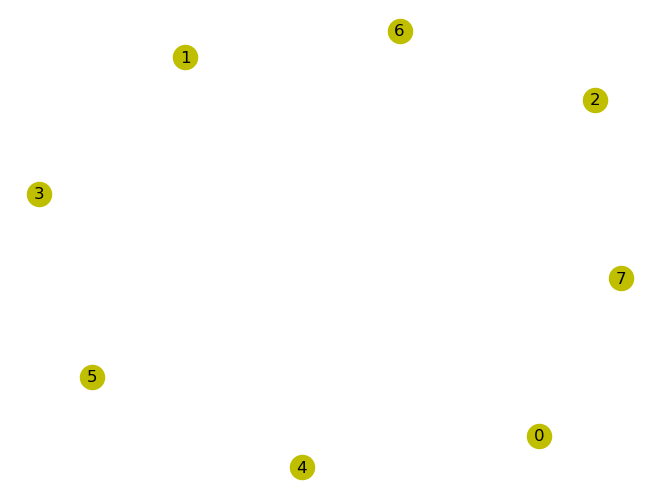

In [27]:
T = nx.empty_graph(n)
nx.draw(T, **opts)

In [28]:
code

[6, 5, 0, 6, 3, 0]

In [29]:
# repeat n-2 times:
for y in code:
    x = degrees.index(1)
    T.add_edge(x, y)
    degrees[x] -= 1;  degrees[y] -= 1
    print(degrees, ": adding edge", x, "--", y)


[3, 0, 1, 2, 1, 2, 2, 1] : adding edge 1 -- 6
[3, 0, 0, 2, 1, 1, 2, 1] : adding edge 2 -- 5
[2, 0, 0, 2, 0, 1, 2, 1] : adding edge 4 -- 0
[2, 0, 0, 2, 0, 0, 1, 1] : adding edge 5 -- 6
[2, 0, 0, 1, 0, 0, 0, 1] : adding edge 6 -- 3
[1, 0, 0, 0, 0, 0, 0, 1] : adding edge 3 -- 0


Add the final edge:

In [30]:
e = [x for x in range(n) if degrees[x] == 1]
T.add_edge(*e)
print(e)

[0, 7]


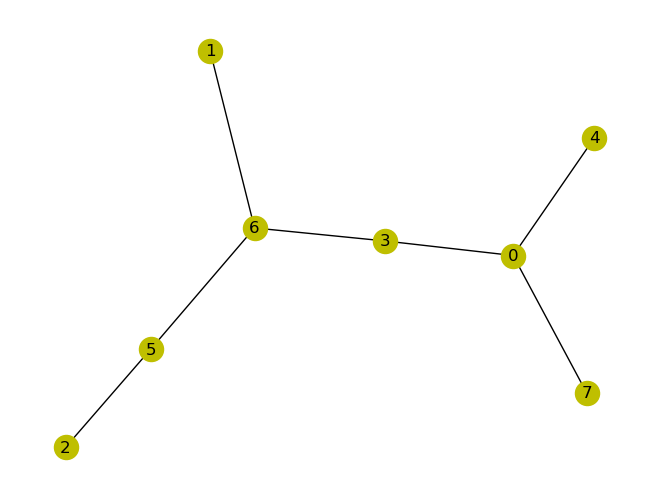

In [31]:
nx.draw(T, **opts)

Turn the entire procedure into a `python` function:

In [32]:
def tree_pruefer(code):

    # initialize graph and defects
    n = len(code) + 2
    tree = nx.empty_graph(n)
    degrees = [1 for x in tree]
    for y in code:
        degrees[y] += 1
        
    # add edges
    for y in code:
        for x in tree:
            if degrees[x] == 1:
                tree.add_edge(x, y)
                for z in (x, y):
                    degrees[z] -= 1
                break
                
    # final edge
    e = [x for x in tree if degrees[x] == 1]
    tree.add_edge(*e)
    
    return tree

* We can now construct a random tree on $n$ nodes from a random Prüfer code of length $n-2$.

In [33]:
code = np.random.randint(n, size=n-2)
code

array([2, 2, 0, 4, 1, 3])

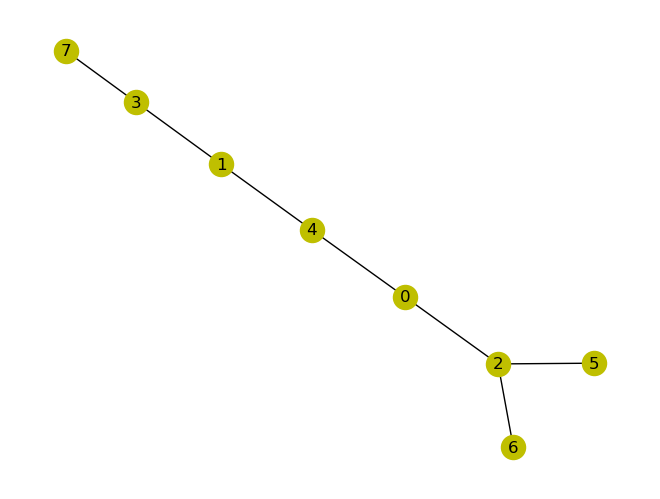

In [38]:
tree = tree_pruefer(code)
nx.draw(tree, **opts)

Finally, we wrap this up into our own `python` function `random_tree`.

In [39]:
def random_tree(n):
    code = np.random.randint(n, size=n-2)
    return tree_pruefer(code)

In [40]:
T = random_tree(20)


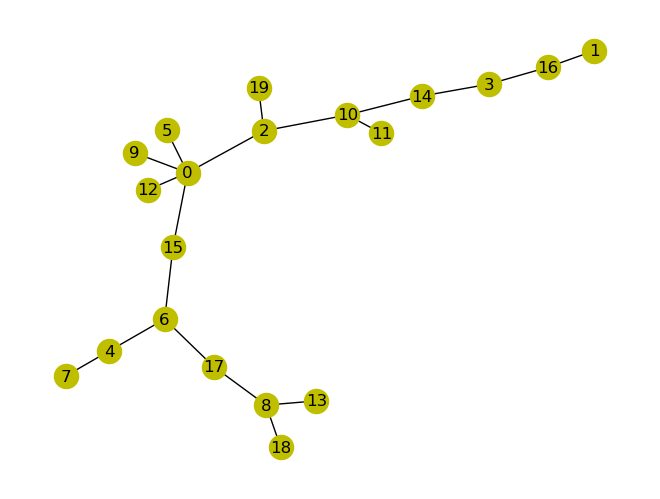

In [41]:
nx.draw(T, **opts)

## Next: Depth First and Breadth First Search

[DFS](https://en.wikipedia.org/wiki/Depth-first_search)
and [BFS](https://en.wikipedia.org/wiki/Breadth-first_search)
are simple but efficient tree (and graph) traversal algorithms.

##  Code Corner

### `python`

* `+=`, `-=`: augmented assignment statements [[doc]](https://docs.python.org/3/reference/simple_stmts.html#augmented-assignment-statements)
* `generator` [[doc]](https://docs.python.org/3/glossary.html#term-generator)

### `networkx`

* `connected_components` [[doc]](https://networkx.github.io/documentation/stable/reference/algorithms/component.html)

* `random_labeled_tree` [[doc]](https://networkx.org/documentation/stable/reference/generated/networkx.generators.trees.random_labeled_tree.html#networkx.generators.trees.random_labeled_tree)

* `copy`: [[doc]](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.copy.html)

* `empty_graph` [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.empty_graph.html)

### `numpy`

* `array`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.array.html)

* `transpose`: [[doc]](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html)

* `random.randint`: [[doc]](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)

## Exercises

1.  A tree $T$ uniquely determines its Prüfer code,
and hence the two nodes that remain after (destructively)
computing the code.   What are those two nodes, in terms of
properties of $T$, or its Prüfer code?

2. What tree has Prüfer code $[0, 1, 2, \dots, n-3]$?